In [6]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-1 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Fuel dimer,Unnamed: 5,Phenol waste,Unnamed: 7,Unnamed: 8,Unnamed: 9,Alanine waste
0,-480,0.000000,1.0,48.000000,0,0.000,0.000000,0.00,0.000000,1.0,0.000000
1,0,8.000000,76573.7,47.295609,0,1140.440,0.704391,2472.45,1.018070,119464.0,0.973274
2,276,12.600000,41835.4,47.223396,0,687.997,0.776604,1576.33,1.186231,68478.8,1.080061
3,527,16.783333,41691.8,47.157130,0,745.185,0.842870,1793.94,1.352737,68464.7,1.225602
4,778,20.966667,41658.8,47.032639,0,856.833,0.967361,1952.48,1.469562,68372.1,1.332664


In [7]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Fuel dimer":"Fuel_dimer", "Phenol waste":"Phenol_waste", "Alanine waste":"Alanine_waste"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Fuel_dimer,Unnamed: 5,Phenol_waste,Unnamed: 7,Unnamed: 8,Unnamed: 9,Alanine_waste
0,-480,0.000000,1.0,48.000000,0,0.000,0.000000,0.00,0.000000,1.0,0.000000
1,0,8.000000,76573.7,47.295609,0,1140.440,0.704391,2472.45,1.018070,119464.0,0.973274
2,276,12.600000,41835.4,47.223396,0,687.997,0.776604,1576.33,1.186231,68478.8,1.080061
3,527,16.783333,41691.8,47.157130,0,745.185,0.842870,1793.94,1.352737,68464.7,1.225602
4,778,20.966667,41658.8,47.032639,0,856.833,0.967361,1952.48,1.469562,68372.1,1.332664


Derivative(alanine_waste, t; k1) = k1*fuel
Derivative(fuel, t; k1) = -k1*fuel
Derivative(phenol_waste, t; k1) = k1*fuel

Parameter Value        Standard Deviation
k1        8.275242e-04 4.615758e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7f8bb8a13760>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7f8bb8a13730>

Goodness of fit qualifiers:
chi_squared            3.1533039787000012
objective_value        1.5766519893500006
r_squared              0.7296532363815973


<IPython.core.display.Javascript object>


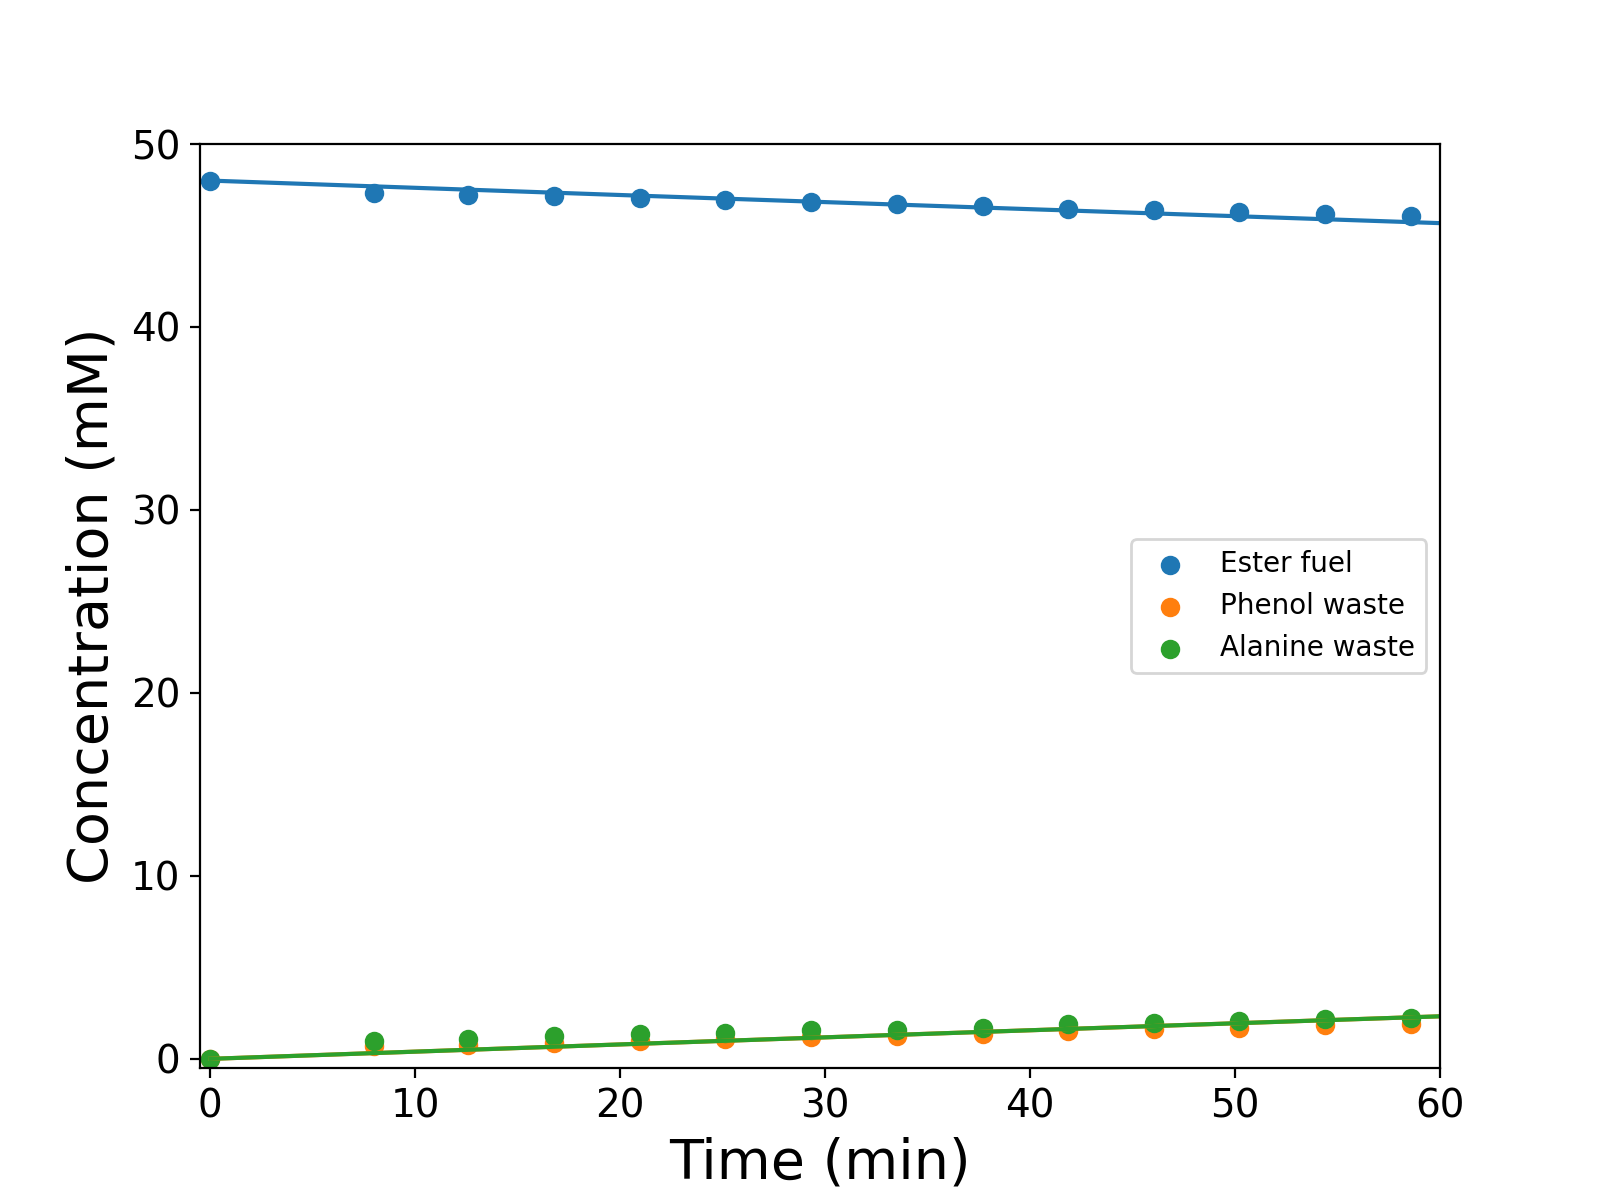

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-223-1 (pH 6.10) with a detailed model based on concentration, not abundance. The concentration was calculated WITHOUT a external standard.

"""

t, fuel, fuel_dimer, phenol_waste, alanine_waste = variables('t, fuel, fuel_dimer, phenol_waste, alanine_waste')
k1, k2 = parameters('k1, k2')
k1.value = 0.0006

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)
fuel_dimer_data = np.array(reaction_data.Fuel_dimer, dtype=np.float64)
phenol_waste_data = np.array(reaction_data.Phenol_waste, dtype=np.float64)
alanine_waste_data = np.array(reaction_data.Alanine_waste, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0
fuel_dimer0 = 0.0
phenol_waste0 = 0.0
alanine_waste0 = 0.0

model_dict = {
    D(fuel, t): -k1*fuel,
    D(phenol_waste, t): k1*fuel,
    D(alanine_waste, t): k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0, phenol_waste: phenol_waste0, alanine_waste: alanine_waste0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data, phenol_waste=phenol_waste_data, alanine_waste=alanine_waste_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
alanine_waste, fuel, phenol_waste = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel)
ax.plot(tvec, phenol_waste)
ax.plot(tvec, alanine_waste)

ax.scatter(t_data, fuel_data, label='Ester fuel')
ax.scatter(t_data, phenol_waste_data, label='Phenol waste')
ax.scatter(t_data, alanine_waste_data, label='Alanine waste')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax.set_xlim(-0.5, 60.0)
ax.set_ylim(-0.5, 50.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [12]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-2 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Phenol waste,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Alanine waste,Fuel dimer
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000000,0.000000
1,0,7.000000,81352.1,46.554013,1048.780,0.600168,1478.050,0.845819,3550.96,1.354699,128897.0,828.732,949.278,1.269844,0.296359
2,274,11.566667,41052.2,46.332294,519.414,0.586221,958.238,1.081486,2004.61,1.508294,67215.9,367.135,419.793,1.374444,0.251723
3,525,15.750000,40833.4,45.915123,689.170,0.774937,1164.960,1.309939,2269.20,1.701068,66690.1,231.555,431.066,1.564473,0.159643
4,776,19.933333,40516.7,45.834369,533.796,0.603855,1380.580,1.561776,2595.81,1.957667,66197.9,398.505,489.702,1.788109,0.274508


In [13]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Fuel dimer":"Fuel_dimer", "Phenol waste":"Phenol_waste", "Alanine waste":"Alanine_waste"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Phenol_waste,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Alanine_waste,Fuel_dimer
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000000,0.000000
1,0,7.000000,81352.1,46.554013,1048.780,0.600168,1478.050,0.845819,3550.96,1.354699,128897.0,828.732,949.278,1.269844,0.296359
2,274,11.566667,41052.2,46.332294,519.414,0.586221,958.238,1.081486,2004.61,1.508294,67215.9,367.135,419.793,1.374444,0.251723
3,525,15.750000,40833.4,45.915123,689.170,0.774937,1164.960,1.309939,2269.20,1.701068,66690.1,231.555,431.066,1.564473,0.159643
4,776,19.933333,40516.7,45.834369,533.796,0.603855,1380.580,1.561776,2595.81,1.957667,66197.9,398.505,489.702,1.788109,0.274508


Derivative(alanine_waste, t; k1, k2, k3) = k1*fuel
Derivative(fuel, t; k1, k2, k3) = -k1*fuel - 2*k2*fuel**2
Derivative(fuel_dimer, t; k1, k2, k3) = k2*fuel**2 - k3*fuel_dimer
Derivative(phenol_waste, t; k1, k2, k3) = k1*fuel + k2*fuel**2 + k3*fuel_dimer

Parameter Value        Standard Deviation
k1        1.477725e-03 1.209786e-04
k2        4.914711e-06 1.722039e-06
k3        0.000000e+00 1.963873e-02
Status message         CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7f8bc9bb3bb0>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x7f8bc9bb3c70>

Goodness of fit qualifiers:
chi_squared            5.926993234045752
objective_value        2.963496617022876
r_squared              0.8952218473651534


<IPython.core.display.Javascript object>


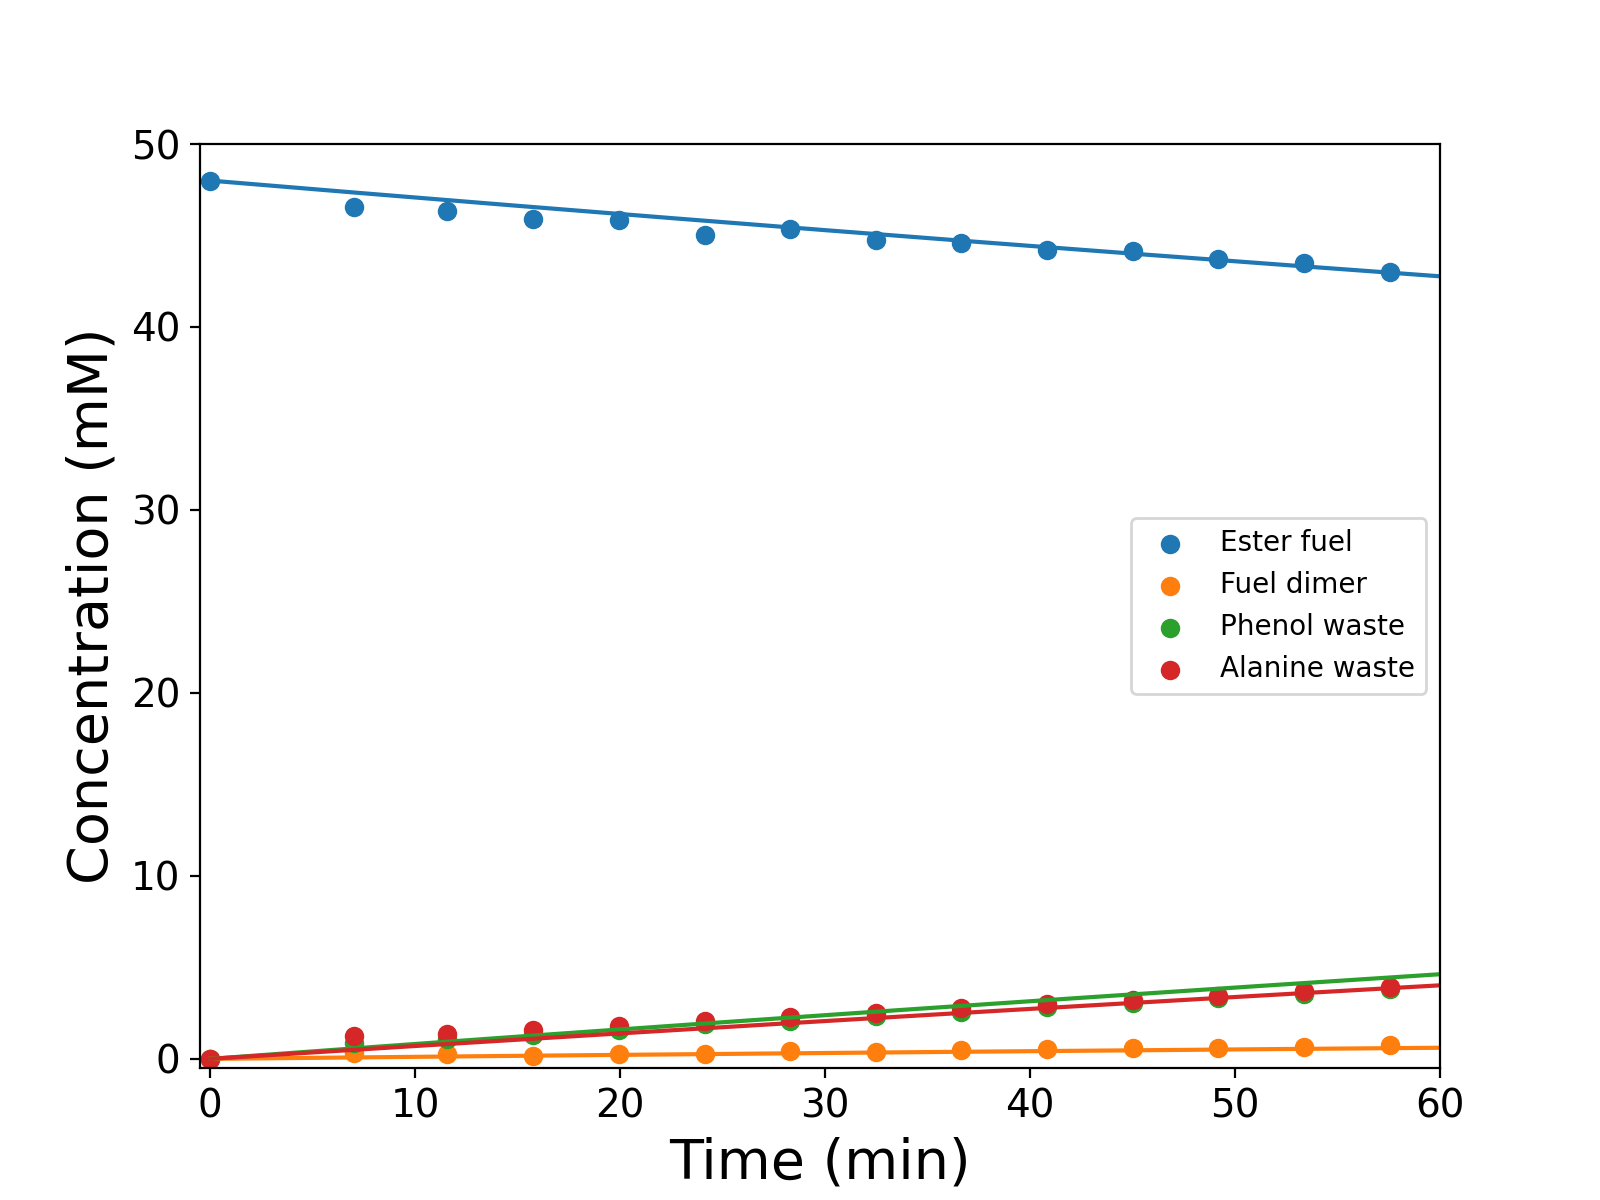

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import Parameter, variables, Fit, D, ODEModel, Ge, Eq

%matplotlib nbagg

"""
Fitting to SA02-223-2 (pH 6.55) with a detailed model based on concentration, not abundance. The concentration was calculated WITHOUT a external standard.

"""

t, fuel, fuel_dimer, phenol_waste, alanine_waste = variables('t, fuel, fuel_dimer, phenol_waste, alanine_waste')
k1 = Parameter('k1', min=0.0)
k2 = Parameter('k2', min=0.0)
k3 = Parameter('k3', min=0.0)
k1.value = 0.002
k2.value = 0.0
k3.value = 0.0

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)
fuel_dimer_data = np.array(reaction_data.Fuel_dimer, dtype=np.float64)
phenol_waste_data = np.array(reaction_data.Phenol_waste, dtype=np.float64)
alanine_waste_data = np.array(reaction_data.Alanine_waste, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0
fuel_dimer0 = 0.0
phenol_waste0 = 0.0
alanine_waste0 = 0.0

model_dict = {
    D(fuel, t): -k1*fuel-2*k2*fuel**2,
    D(fuel_dimer, t): k2*fuel**2-k3*fuel_dimer,
    D(phenol_waste, t): k1*fuel+k2*fuel**2+k3*fuel_dimer,
    D(alanine_waste, t): k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0, fuel_dimer: fuel_dimer0, phenol_waste: phenol_waste0, alanine_waste: alanine_waste0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data, fuel_dimer=fuel_dimer_data, phenol_waste=phenol_waste_data, alanine_waste=alanine_waste_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
alanine_waste, fuel, fuel_dimer, phenol_waste = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel)
ax.plot(tvec, fuel_dimer)
ax.plot(tvec, phenol_waste)
ax.plot(tvec, alanine_waste)

ax.scatter(t_data, fuel_data, label='Ester fuel')
ax.scatter(t_data, fuel_dimer_data, label='Fuel dimer')
ax.scatter(t_data, phenol_waste_data, label='Phenol waste')
ax.scatter(t_data, alanine_waste_data, label='Alanine waste')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax.set_xlim(-0.5, 60.0)
ax.set_ylim(-0.5, 50.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [16]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-3 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Phenol waste,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Fuel dimer,Alanine waste
0,-420,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,1.0,0.00,0.00,0.00,0.000000,0.000000
1,0,7.000000,75629.6,45.245722,1659.56,0.992839,2944.30,1.761440,119491.0,2397.14,2969.44,4297.73,0.890886,1.597232
2,282,11.700000,37068.3,43.853528,1350.21,1.597361,2154.70,2.549111,60483.0,1457.22,1907.36,2727.45,1.050643,1.966467
3,533,15.883333,36004.6,42.502162,1843.56,2.176258,2813.79,3.321580,59352.5,2483.06,2700.51,3582.56,1.749696,2.524462
4,784,20.066667,35027.7,41.589316,1961.69,2.329166,3437.57,4.081518,57233.4,2711.77,3086.44,4082.75,1.939450,2.919971


In [17]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Fuel dimer":"Fuel_dimer", "Phenol waste":"Phenol_waste", "Alanine waste":"Alanine_waste"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Phenol_waste,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Fuel_dimer,Alanine_waste
0,-420,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,1.0,0.00,0.00,0.00,0.000000,0.000000
1,0,7.000000,75629.6,45.245722,1659.56,0.992839,2944.30,1.761440,119491.0,2397.14,2969.44,4297.73,0.890886,1.597232
2,282,11.700000,37068.3,43.853528,1350.21,1.597361,2154.70,2.549111,60483.0,1457.22,1907.36,2727.45,1.050643,1.966467
3,533,15.883333,36004.6,42.502162,1843.56,2.176258,2813.79,3.321580,59352.5,2483.06,2700.51,3582.56,1.749696,2.524462
4,784,20.066667,35027.7,41.589316,1961.69,2.329166,3437.57,4.081518,57233.4,2711.77,3086.44,4082.75,1.939450,2.919971


Derivative(alanine_waste, t; k1, k2, k3) = k1*fuel
Derivative(fuel, t; k1, k2, k3) = -k1*fuel - 2*k2*fuel**2
Derivative(fuel_dimer, t; k1, k2, k3) = k2*fuel**2 - k3*fuel_dimer
Derivative(phenol_waste, t; k1, k2, k3) = k1*fuel + k2*fuel**2 + k3*fuel_dimer

Parameter Value        Standard Deviation
k1        2.717797e-03 1.335066e-04
k2        4.353712e-05 2.219920e-06
k3        0.000000e+00 2.554458e-03
Status message         CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Number of iterations   22
Objective              <symfit.core.objectives.LeastSquares object at 0x7f8ba082c8b0>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x7f8bc9b91310>

Goodness of fit qualifiers:
chi_squared            5.992472633004123
objective_value        2.9962363165020616
r_squared              0.9855329039866969


<IPython.core.display.Javascript object>


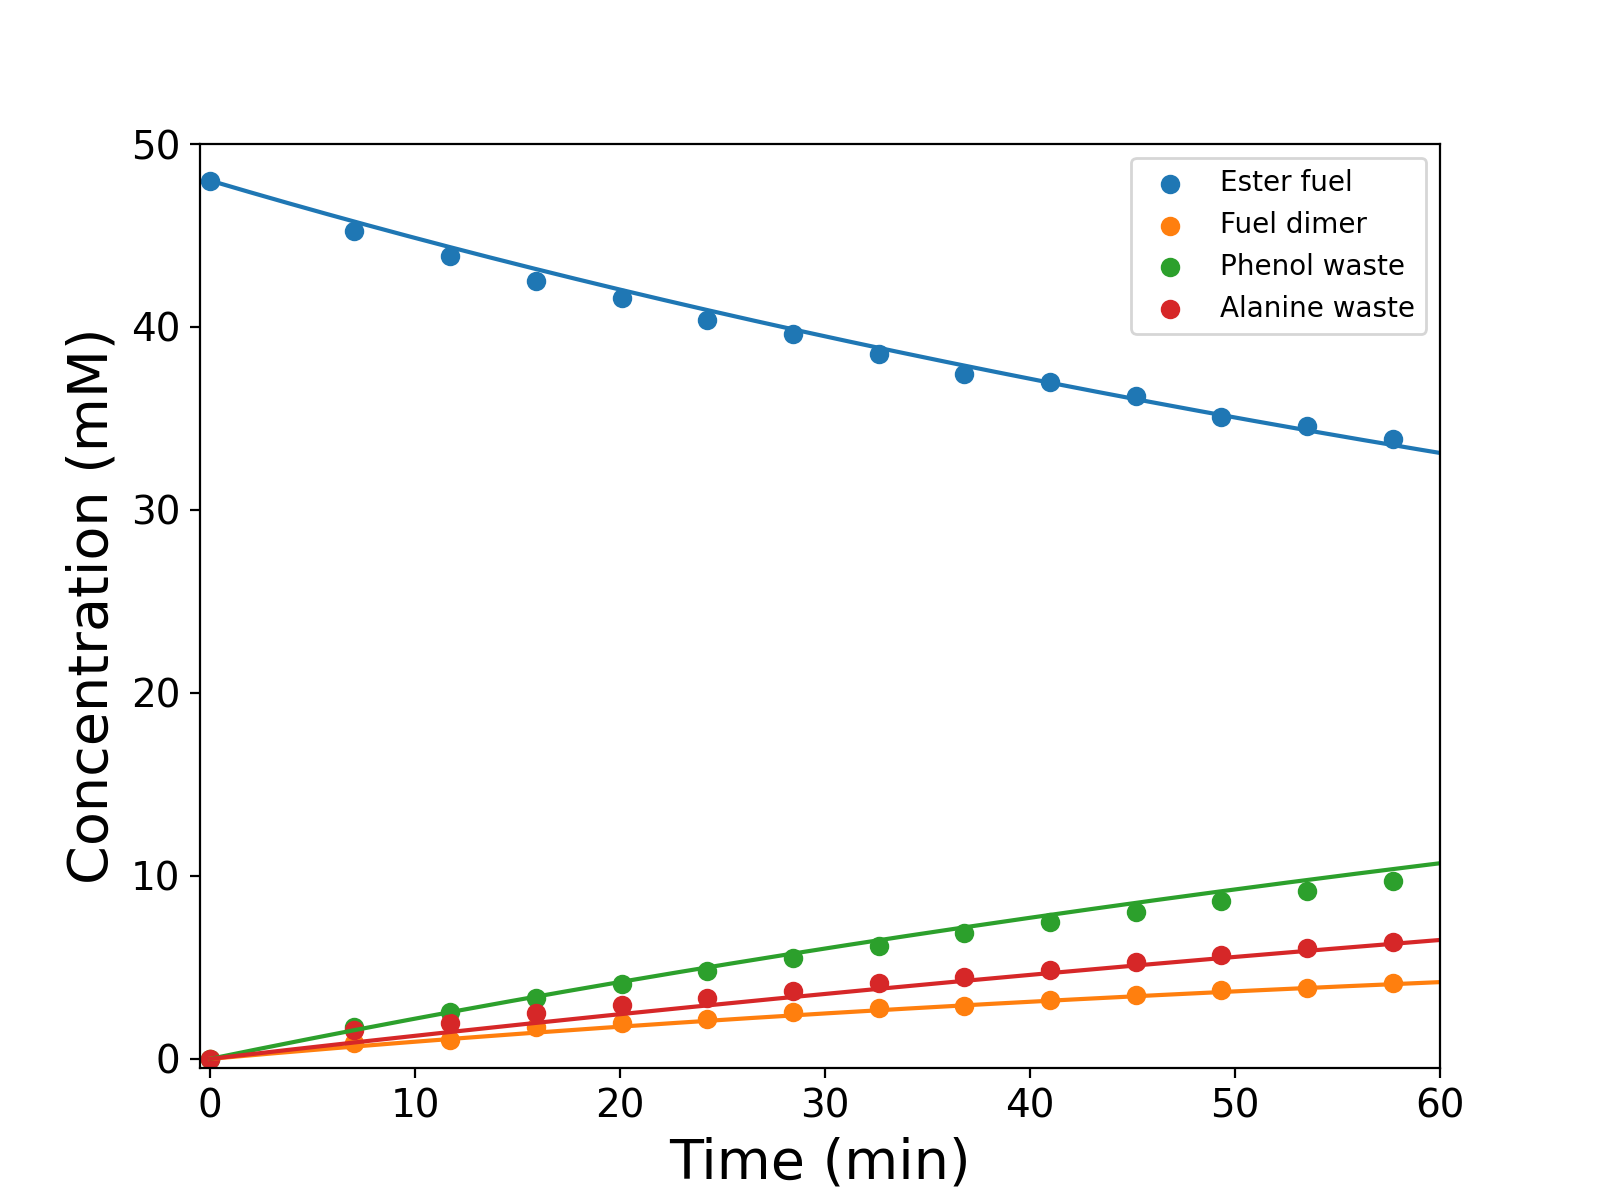

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import Parameter, variables, Fit, D, ODEModel, Ge, Eq

%matplotlib nbagg

"""
Fitting to SA02-223-3 (pH 7.00) with a detailed model based on concentration, not abundance. The concentration was calculated WITHOUT a external standard.

"""

t, fuel, fuel_dimer, phenol_waste, alanine_waste = variables('t, fuel, fuel_dimer, phenol_waste, alanine_waste')
k1 = Parameter('k1', min=0.0)
k2 = Parameter('k2', min=0.0)
k3 = Parameter('k3', min=0.0)
k1.value = 0.002
k2.value = 0.0
k3.value = 0.0

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)
fuel_dimer_data = np.array(reaction_data.Fuel_dimer, dtype=np.float64)
phenol_waste_data = np.array(reaction_data.Phenol_waste, dtype=np.float64)
alanine_waste_data = np.array(reaction_data.Alanine_waste, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0
fuel_dimer0 = 0.0
phenol_waste0 = 0.0
alanine_waste0 = 0.0

model_dict = {
    D(fuel, t): -k1*fuel-2*k2*fuel**2,
    D(fuel_dimer, t): k2*fuel**2-k3*fuel_dimer,
    D(phenol_waste, t): k1*fuel+k2*fuel**2+k3*fuel_dimer,
    D(alanine_waste, t): k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0, fuel_dimer: fuel_dimer0, phenol_waste: phenol_waste0, alanine_waste: alanine_waste0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data, fuel_dimer=fuel_dimer_data, phenol_waste=phenol_waste_data, alanine_waste=alanine_waste_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
alanine_waste, fuel, fuel_dimer, phenol_waste = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel)
ax.plot(tvec, fuel_dimer)
ax.plot(tvec, phenol_waste)
ax.plot(tvec, alanine_waste)

ax.scatter(t_data, fuel_data, label='Ester fuel')
ax.scatter(t_data, fuel_dimer_data, label='Fuel dimer')
ax.scatter(t_data, phenol_waste_data, label='Phenol waste')
ax.scatter(t_data, alanine_waste_data, label='Alanine waste')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax.set_xlim(-0.5, 60.0)
ax.set_ylim(-0.5, 50.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()